# lab_ldl/lab_hdl

# Load data

In [7]:
import pandas as pd

data = pd.read_csv("data/clinDat.csv")

id          sex
0_A10010    2.0
0_A10053    1.0
0_A10061    1.0
0_A10209    1.0
           ... 
2_A9758     1.0
2_A9822     1.0
2_A9829     1.0
2_A9839     1.0
2_A9987     1.0
Name: 1, Length: 183, dtype: object

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/clinDat.csv")
df = df.T

df.columns = df.iloc[0]
df = df[1:]

# Clean the data - 1

## Handle NAs

In [2]:
to_impute = []
to_drop = []

# Find columns with appropriate/critical missing values (> 30%)
for i in range(len(df.T)):
    miss = df.iloc[:, i].isna().mean()
    col_name = df.iloc[:, i].name
    if miss == 0:
        continue
    elif miss <= 0.3:
        print(f"Column {i}, {col_name}: Appropriate missing values (to be imputed) - {miss}")
        to_impute.append(col_name)
    else:
        print(f"Column {i}, {col_name}: Critical missing values (to be dropped) - {miss}")
        to_drop.append(col_name)

Column 7, adipositas: Appropriate missing values (to be imputed) - 0.005494505494505495
Column 12, family_dispostion: Appropriate missing values (to be imputed) - 0.005494505494505495
Column 15, med_aceinhibitor: Appropriate missing values (to be imputed) - 0.04395604395604396
Column 16, med_antiarrythmic: Appropriate missing values (to be imputed) - 0.26373626373626374
Column 17, med_anticoagulants: Appropriate missing values (to be imputed) - 0.26373626373626374
Column 19, med_betablocker: Appropriate missing values (to be imputed) - 0.04395604395604396
Column 20, med_caantagonist: Appropriate missing values (to be imputed) - 0.2802197802197802
Column 21, med_diuretika: Appropriate missing values (to be imputed) - 0.04395604395604396
Column 22, med_nitrates_oral: Appropriate missing values (to be imputed) - 0.29120879120879123
Column 48, prior_tumor: Appropriate missing values (to be imputed) - 0.01098901098901099
Column 50, kd_lvef_percent: Appropriate missing values (to be imputed)

1. **To be dropped:** lab_crp_preop, lab_crp_first.postop
2. Others are **imputed**. Most variables are categorical

In [3]:
# Dropping
for col in to_drop:
    df.drop(col, axis=1, inplace=True)

In [4]:
# list of continuous variables
continuous_vars = ["age", "bmi_num", "weight_kg_num",
             "height_cm_num", "body_surface_m2_num",
             "lab_gfr", "lab_hb", "lab_krea", "lab_bilirubin", "lab_hdl",
             "lab_ldl", "lab_tropi", "lab_ck", "lab_ckmb", "euroscore1_add_num",
             "euroscore1_log_num", "euroscore2_num", "kd_lvef_percent"]

# assign a "category" dtype to categorical variables
for i, col in enumerate(to_impute):
    if col not in continuous_vars:
        df[col] = df[col].astype('category')
        print(f"{i+1} Categorical:", col, f"\n{df[col].value_counts()}")
    else:
        print(f"{i+1} Continuous:", col)

1 Categorical: adipositas 
adipositas
0.0    110
1.0     71
Name: count, dtype: int64
2 Categorical: family_dispostion 
family_dispostion
0.0    114
1.0     67
Name: count, dtype: int64
3 Categorical: med_aceinhibitor 
med_aceinhibitor
0.0    93
1.0    81
Name: count, dtype: int64
4 Categorical: med_antiarrythmic 
med_antiarrythmic
0.0    128
1.0      6
Name: count, dtype: int64
5 Categorical: med_anticoagulants 
med_anticoagulants
0.0    93
1.0    41
Name: count, dtype: int64
6 Categorical: med_betablocker 
med_betablocker
0.0    87
1.0    87
Name: count, dtype: int64
7 Categorical: med_caantagonist 
med_caantagonist
0.0    99
1.0    32
Name: count, dtype: int64
8 Categorical: med_diuretika 
med_diuretika
0.0    112
1.0     62
Name: count, dtype: int64
9 Categorical: med_nitrates_oral 
med_nitrates_oral
0.0    128
1.0      1
Name: count, dtype: int64
10 Categorical: prior_tumor 
prior_tumor
0.0    170
1.0     10
Name: count, dtype: int64
11 Continuous: kd_lvef_percent
12 Categorical: 

### Impute missing values of one continuous variable (kd_lvef_percent)

In [5]:
import numpy as np
from sklearn.impute import SimpleImputer

kdl = np.array(df['kd_lvef_percent']).reshape(-1, 1)  # Reshape to 2D array

imputer = SimpleImputer(strategy="median")

imputer.fit(kdl)

X = imputer.transform(kdl)
df['kd_lvef_percent'] = X

In [6]:
cont_df = df[continuous_vars].T
cont_df.index.name = None
print(cont_df.iloc[:5,:5])
print("\nShape:", cont_df.shape)

                     0_A10010   0_A10053   0_A10061   0_A10209    0_A8070
age                      75.0       65.0       58.0       63.0       77.0
bmi_num               23.4375  34.949435  32.653061  29.352355  23.671254
weight_kg_num            60.0       94.0      100.0       93.0       75.0
height_cm_num           160.0      164.0      175.0      178.0      178.0
body_surface_m2_num  1.622063   1.998515   2.150646   2.111184   1.926734

Shape: (18, 182)


### PCA

In [7]:
import utils

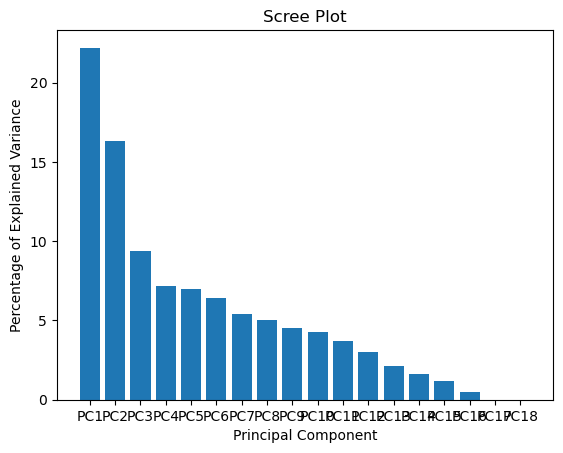

In [8]:
utils.run_pca_scree(cont_df)

In [9]:
to_impute = ['adipositas',
 'family_dispostion',
 'med_aceinhibitor',
 'med_antiarrythmic',
 'med_anticoagulants',
 'med_betablocker',
 'med_caantagonist',
 'med_diuretika',
 'med_nitrates_oral',
 'prior_tumor',
 'kd_main_stem_stenosis']

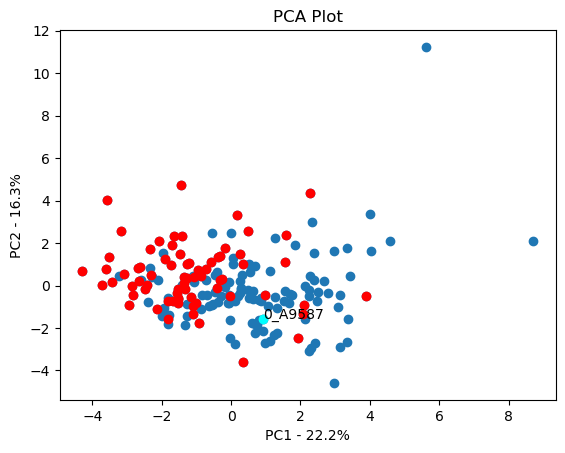

adipositas


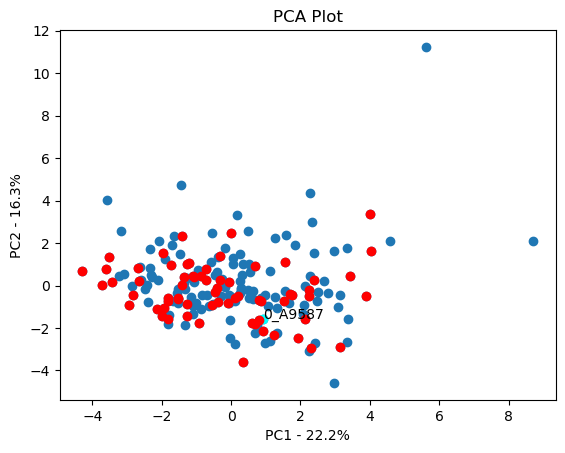

family_dispostion


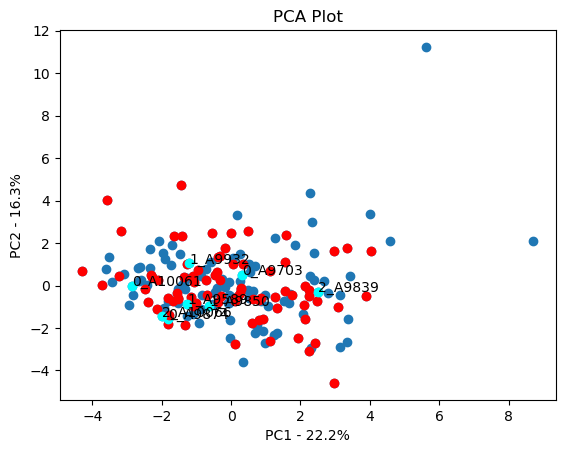

med_aceinhibitor


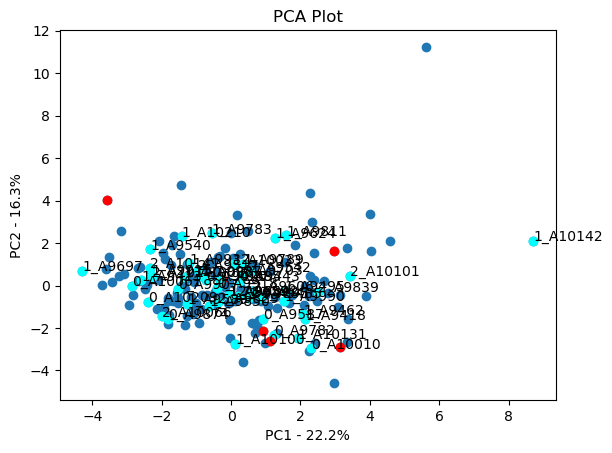

med_antiarrythmic


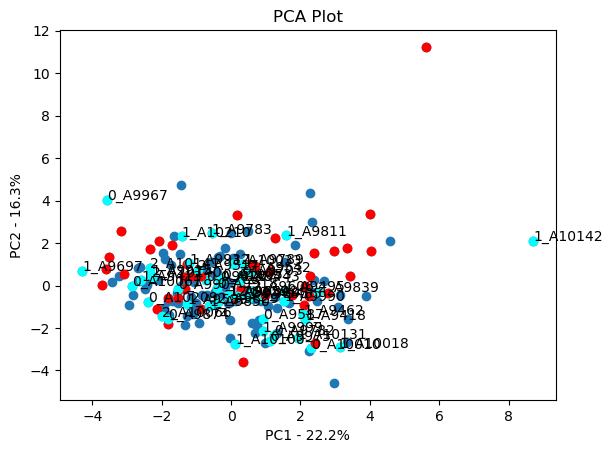

med_anticoagulants


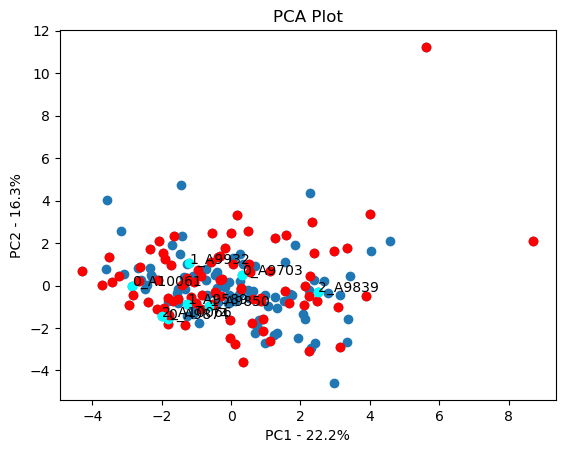

med_betablocker


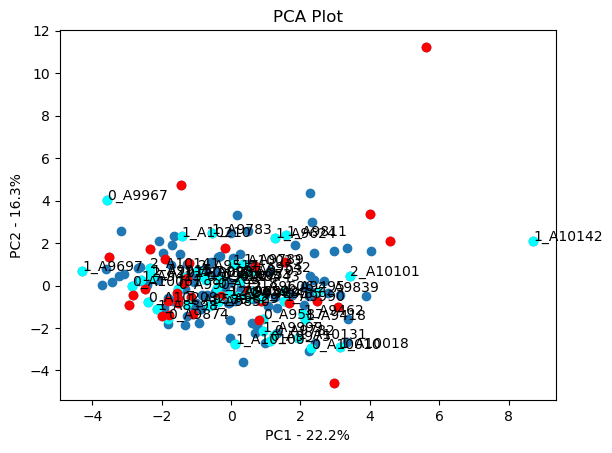

med_caantagonist


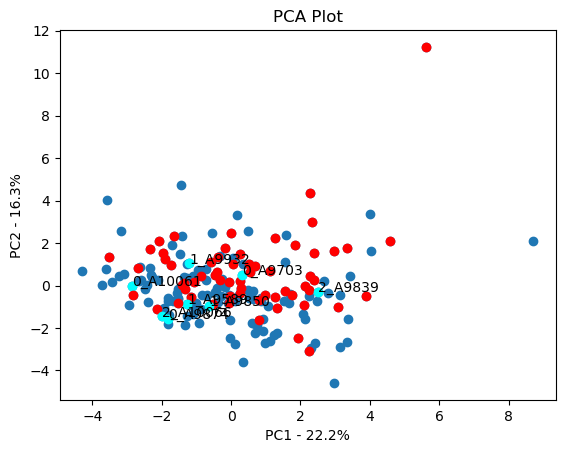

med_diuretika


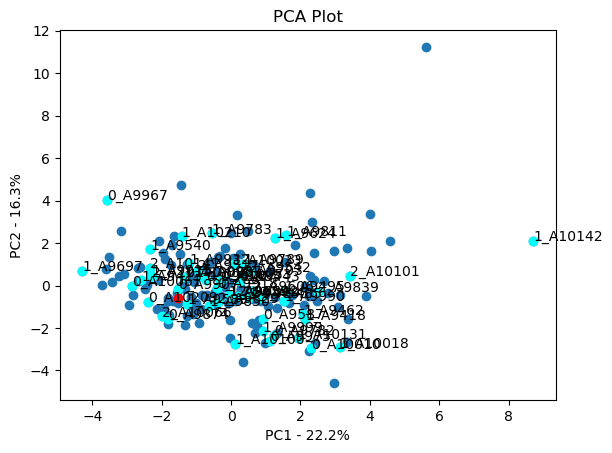

med_nitrates_oral


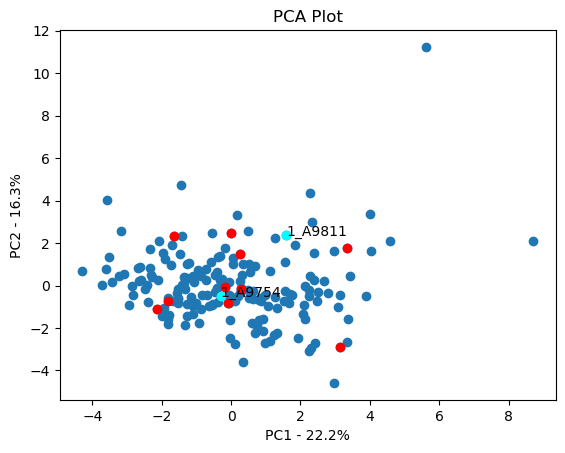

prior_tumor


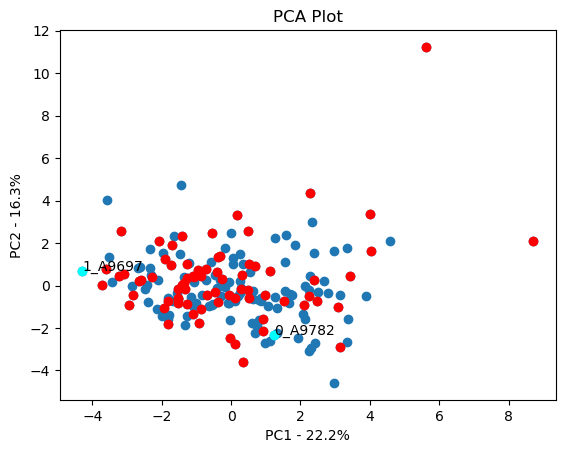

kd_main_stem_stenosis


<Figure size 640x480 with 0 Axes>

In [10]:
for var in to_impute:
    utils.run_pca_plot(cont_df, var, df[df[var].isna()].index.tolist(), df)
    print(var)
    plt.figure()

### Drop categorical variables with # of missing values > 10%

In [11]:
to_drop = ["med_antiarrythmic",
           "med_anticoagulants",
           "med_caantagonist",
           "med_nitrates_oral"]

# Dropping
for col in to_drop:
    df.drop(col, axis=1, inplace=True)

In [12]:
df

id,age,sex,death,bmi_num,weight_kg_num,height_cm_num,body_surface_m2_num,adipositas,diabetes_cat,hyperlipidaemia_cat,...,lab_total_cholesterol,lab_hdl,lab_ldl,med_hypercholesterolemia,acute_myocardial_infarction,myocardial_infarction_any_time,number_of_myocardial_infarction_any_time,rhythm,atrial_fibrillation,affected_coronary_vessels
0_A10010,75.0,2.0,1.0,23.4375,60.0,160.0,1.622063,0.0,1.0,3.0,...,134.0,55.7,69.4,2.0,0.0,0.0,0.0,1.0,1.0,2.0
0_A10053,65.0,1.0,0.0,34.949435,94.0,164.0,1.998515,1.0,1.0,3.0,...,160.0,44.3,99.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0
0_A10061,58.0,1.0,0.0,32.653061,100.0,175.0,2.150646,1.0,4.0,3.0,...,140.0,42.9,85.7,2.0,0.0,0.0,0.0,1.0,1.0,3.0
0_A10209,63.0,1.0,0.0,29.352355,93.0,178.0,2.111184,0.0,4.0,3.0,...,199.0,36.8,143.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0
0_A8070,77.0,1.0,0.0,23.671254,75.0,178.0,1.926734,0.0,1.0,3.0,...,174.0,54.2,111.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_A9758,66.0,1.0,1.0,36.289737,100.0,166.0,2.069878,1.0,3.0,3.0,...,255.0,38.9,175.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0
2_A9822,62.0,1.0,0.0,25.393431,76.0,173.0,1.897997,0.0,4.0,3.0,...,99.1,46.0,46.8,2.0,0.0,0.0,0.0,1.0,1.0,3.0
2_A9829,78.0,1.0,0.0,24.691358,80.0,180.0,1.996421,0.0,1.0,3.0,...,230.0,45.4,165.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0
2_A9839,82.0,1.0,0.0,24.221453,70.0,170.0,1.809708,0.0,3.0,3.0,...,125.0,47.7,66.1,2.0,1.0,1.0,1.0,2.0,2.0,3.0


In [13]:
sample_names = df.index.to_list()

### KNN Imputer on categorical variables

In [14]:
from sklearn.impute import KNNImputer

to_impute = ['adipositas',
 'family_dispostion',
 'med_aceinhibitor',
 'med_betablocker',
 'med_diuretika',
 'prior_tumor',
 'kd_main_stem_stenosis']

knn_imputer = KNNImputer(n_neighbors=13)
data_imputed = knn_imputer.fit_transform(df)

data_imputed = pd.DataFrame(data_imputed, columns=df.columns)

data_imputed[to_impute] = data_imputed[to_impute].round().astype(int)

print(data_imputed[to_impute].isnull().sum())

id
adipositas               0
family_dispostion        0
med_aceinhibitor         0
med_betablocker          0
med_diuretika            0
prior_tumor              0
kd_main_stem_stenosis    0
dtype: int64


In [15]:
df = data_imputed

In [16]:
df.index = sample_names

In [17]:
df['ldl_hdl_ratio'] = df['lab_ldl'] / df['lab_hdl']

In [18]:
df.drop(["lab_ldl", "lab_hdl"], axis=1, inplace=True)
df

id,age,sex,death,bmi_num,weight_kg_num,height_cm_num,body_surface_m2_num,adipositas,diabetes_cat,hyperlipidaemia_cat,...,age_of_onset,lab_total_cholesterol,med_hypercholesterolemia,acute_myocardial_infarction,myocardial_infarction_any_time,number_of_myocardial_infarction_any_time,rhythm,atrial_fibrillation,affected_coronary_vessels,ldl_hdl_ratio
0_A10010,75.0,2.0,1.0,23.437500,60.0,160.0,1.622063,0,1.0,3.0,...,74.884484,134.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,1.245961
0_A10053,65.0,1.0,0.0,34.949435,94.0,164.0,1.998515,1,1.0,3.0,...,64.954204,160.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.234763
0_A10061,58.0,1.0,0.0,32.653061,100.0,175.0,2.150646,1,4.0,3.0,...,57.752563,140.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,1.997669
0_A10209,63.0,1.0,0.0,29.352355,93.0,178.0,2.111184,0,4.0,3.0,...,63.319207,199.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,3.885870
0_A8070,77.0,1.0,0.0,23.671254,75.0,178.0,1.926734,0,1.0,3.0,...,76.880383,174.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,2.047970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2_A9758,66.0,1.0,1.0,36.289737,100.0,166.0,2.069878,1,3.0,3.0,...,65.946685,255.0,2.0,0.0,0.0,0.0,1.0,1.0,3.0,4.498715
2_A9822,62.0,1.0,0.0,25.393431,76.0,173.0,1.897997,0,4.0,3.0,...,62.291183,99.1,2.0,0.0,0.0,0.0,1.0,1.0,3.0,1.017391
2_A9829,78.0,1.0,0.0,24.691358,80.0,180.0,1.996421,0,1.0,3.0,...,77.897471,230.0,2.0,1.0,1.0,1.0,2.0,3.0,3.0,3.634361
2_A9839,82.0,1.0,0.0,24.221453,70.0,170.0,1.809708,0,3.0,3.0,...,82.228298,125.0,2.0,1.0,1.0,1.0,2.0,2.0,3.0,1.385744


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0_A10010 to 2_A9987
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       182 non-null    float64
 1   sex                                       182 non-null    float64
 2   death                                     182 non-null    float64
 3   bmi_num                                   182 non-null    float64
 4   weight_kg_num                             182 non-null    float64
 5   height_cm_num                             182 non-null    float64
 6   body_surface_m2_num                       182 non-null    float64
 7   adipositas                                182 non-null    int64  
 8   diabetes_cat                              182 non-null    float64
 9   hyperlipidaemia_cat                       182 non-null    float64
 10  hypertension_cat                

# Looking for correlations

In [20]:
corr_matrix = df.corr()
# for index, row in corr_matrix.iterrows():
#     coeffs = row.sort_values(ascending=False)
#     print(row.name)
#     print("Positive correlation:")
#     print(coeffs[1:4].to_dict())
#     print("Negative correlation:")
#     print(coeffs[-3:-1].to_dict(), "\n")
coeffs = corr_matrix["ldl_hdl_ratio"].sort_values(ascending=False)
print("Positive correlation:")
print(coeffs[1:6].to_dict())
print("Negative correlation:")
print(coeffs[-3:-1].to_dict(), "\n")

Positive correlation:
{'lab_total_cholesterol': 0.6971968781818974, 'weight_kg_num': 0.2323703987010005, 'body_surface_m2_num': 0.22703455372264836, 'bmi_num': 0.183957117073569, 'adipositas': 0.17052804085816328}
Negative correlation:
{'euroscore1_add_num': -0.20513367151503126, 'age': -0.23544478855381246} 



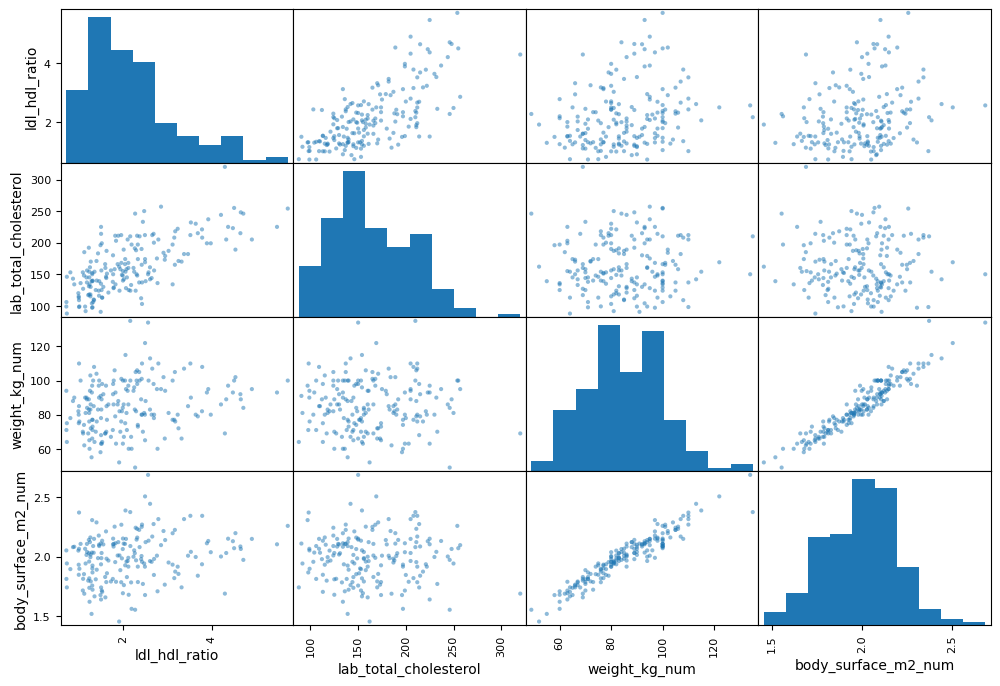

In [21]:
from pandas.plotting import scatter_matrix

attributes = ['ldl_hdl_ratio', 'lab_total_cholesterol', 'weight_kg_num', 'body_surface_m2_num']

scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

The most prommising attribute to predics ldl_hdl_ratio seems to be lab_total_cholesterol

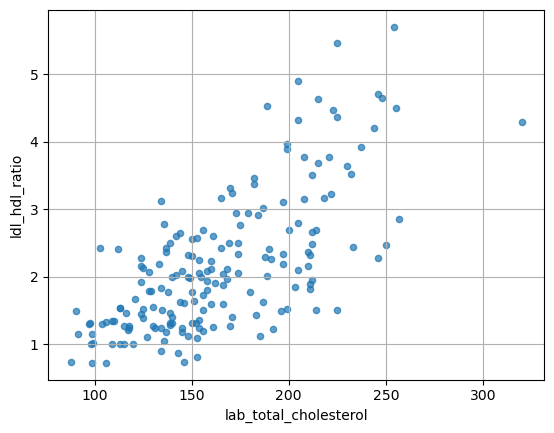

In [22]:
df.plot(kind="scatter", x="lab_total_cholesterol", y="ldl_hdl_ratio", alpha=0.7, grid=True)
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0_A10010 to 2_A9987
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       182 non-null    float64
 1   sex                                       182 non-null    float64
 2   death                                     182 non-null    float64
 3   bmi_num                                   182 non-null    float64
 4   weight_kg_num                             182 non-null    float64
 5   height_cm_num                             182 non-null    float64
 6   body_surface_m2_num                       182 non-null    float64
 7   adipositas                                182 non-null    int64  
 8   diabetes_cat                              182 non-null    float64
 9   hyperlipidaemia_cat                       182 non-null    float64
 10  hypertension_cat                

## Create some more attributes

In [24]:
df['duration_of_condition'] = df['age'] - df['age_of_onset']
df['num_medications'] = df[['med_aceinhibitor', 'med_antiplatelet_cat', 'med_betablocker', 'med_diuretika', 'med_hypercholesterolemia']].sum(axis=1)
df['composite_euroscore'] = df[['euroscore1_add_num', 'euroscore1_log_num', 'euroscore2_num']].mean(axis=1)
df['total_prior_events'] = df[['prior_myocardial_infarction', 'prior_stroke', 'prior_pad', 'prior_schock_cat', 'prior_reanimation_cat', 'prior_synkope_cat', 'prior_tumor']].sum(axis=1)
df['comorbidities'] = df[['adipositas', 'diabetes_cat', 'hyperlipidaemia_cat', 'hypertension_cat', 'renal_disorder_cat', 'copd_cat']].sum(axis=1)
df['length_of_stay_normalized'] = df['length_of_stay'] / df['age']

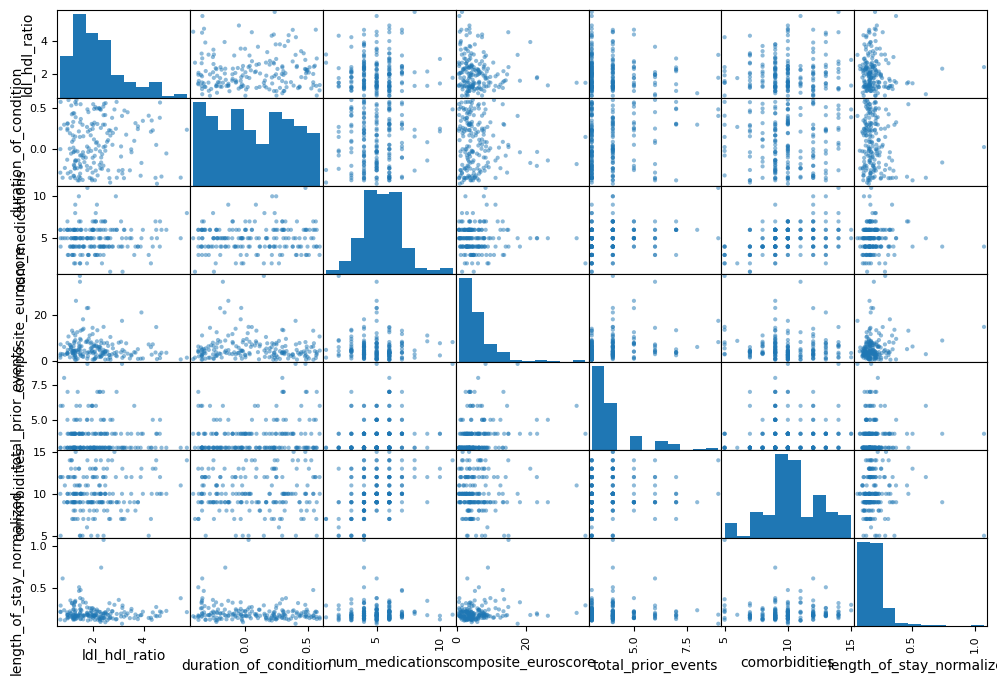

In [25]:
new_attributes = ["duration_of_condition",
                  "num_medications",
                  "composite_euroscore",
                  "total_prior_events",
                  "comorbidities",
                  "length_of_stay_normalized"]
scatter_matrix(df[["ldl_hdl_ratio"]+new_attributes], figsize=(12, 8))
plt.show()

In [26]:
corr_matrix = df.corr()
coeffs = corr_matrix["ldl_hdl_ratio"].sort_values(ascending=False)
[coeffs[x] for x in new_attributes]

[0.03849912168808668,
 0.027324996009175637,
 -0.13550381404647538,
 -0.07852860252598474,
 0.06030074301944524,
 -0.05982531172382609]

In [27]:
df.drop(new_attributes, axis=1, inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0_A10010 to 2_A9987
Data columns (total 61 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   age                                       182 non-null    float64
 1   sex                                       182 non-null    float64
 2   death                                     182 non-null    float64
 3   bmi_num                                   182 non-null    float64
 4   weight_kg_num                             182 non-null    float64
 5   height_cm_num                             182 non-null    float64
 6   body_surface_m2_num                       182 non-null    float64
 7   adipositas                                182 non-null    int64  
 8   diabetes_cat                              182 non-null    float64
 9   hyperlipidaemia_cat                       182 non-null    float64
 10  hypertension_cat                

# Synthetic data generation

In [29]:
!pip install sdv

Defaulting to user installation because normal site-packages is not writeable


In [30]:
continuous_vars += ["length_of_stay", "age_of_onset", "lab_total_cholesterol"]

In [31]:
categorical_features = [x for x in df.columns.to_list() if x not in continuous_vars][:-1]

In [32]:
data = df.copy()

In [34]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

metadata.save_to_json("metadata_2.json")

In [35]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data)

synthetic_data = synthesizer.sample(num_rows=10)

In [36]:
synthetic_data

,age,sex,death,bmi_num,weight_kg_num,height_cm_num,body_surface_m2_num,adipositas,diabetes_cat,hyperlipidaemia_cat,...,age_of_onset,lab_total_cholesterol,med_hypercholesterolemia,acute_myocardial_infarction,myocardial_infarction_any_time,number_of_myocardial_infarction_any_time,rhythm,atrial_fibrillation,affected_coronary_vessels,ldl_hdl_ratio
0,74.0,1.0,0.0,25.577806,77.0,174.0,1.916467,0,4.0,3.0,...,73.052320,116.5,2.0,0.0,0.0,1.0,2.0,1.0,3.0,1.824336
1,47.0,2.0,0.0,33.470208,117.0,188.0,2.418385,1,4.0,3.0,...,46.693096,134.3,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1.944560
2,50.0,2.0,0.0,26.722034,88.0,177.0,2.036160,0,1.0,3.0,...,49.487430,135.2,2.0,1.0,1.0,2.0,1.0,4.0,3.0,1.092429
3,73.0,1.0,0.0,35.528498,100.0,169.0,2.102667,1,1.0,3.0,...,72.765721,223.2,2.0,1.0,0.0,1.0,2.0,1.0,3.0,3.762752
4,78.0,1.0,0.0,24.988019,78.0,178.0,1.963106,0,1.0,3.0,...,78.048324,102.4,2.0,0.0,0.0,0.0,1.0,1.0,2.0,1.422754
5,62.0,1.0,0.0,31.942658,102.0,181.0,2.222573,1,1.0,3.0,...,62.332526,211.9,1.0,0.0,0.0,1.0,1.0,1.0,2.0,2.270490
6,74.0,1.0,0.0,25.414860,84.0,179.0,2.010932,1,1.0,3.0,...,74.205315,166.1,1.0,1.0,0.0,1.0,1.0,3.0,3.0,1.785481
7,74.0,1.0,0.0,33.407502,119.0,195.0,2.525968,0,1.0,1.0,...,74.067519,290.2,3.0,0.0,0.0,1.0,2.0,2.0,3.0,5.705329
8,71.0,1.0,0.0,28.935562,102.0,187.0,2.273844,1,1.0,1.0,...,71.417101,199.8,2.0,0.0,0.0,0.0,2.0,1.0,3.0,4.693673
9,67.0,1.0,0.0,34.809122,94.0,165.0,2.011994,1,3.0,3.0,...,67.364515,231.2,2.0,0.0,0.0,1.0,1.0,1.0,3.0,1.495621


In [37]:
synthesizer.save(
    filepath='my_synthesizer.pkl'
)

In [38]:
synthetic_data = synthesizer.sample(
    num_rows=100_000,
    batch_size=1_000
)

Sampling rows: 100%|██████████| 100000/100000 [00:49<00:00, 2008.85it/s]


In [39]:
synthetic_data

,age,sex,death,bmi_num,weight_kg_num,height_cm_num,body_surface_m2_num,adipositas,diabetes_cat,hyperlipidaemia_cat,...,age_of_onset,lab_total_cholesterol,med_hypercholesterolemia,acute_myocardial_infarction,myocardial_infarction_any_time,number_of_myocardial_infarction_any_time,rhythm,atrial_fibrillation,affected_coronary_vessels,ldl_hdl_ratio
0,67.0,1.0,0.0,25.782253,92.0,186.0,2.150794,1,1.0,3.0,...,67.021701,130.6,1.0,1.0,0.0,1.0,1.0,3.0,3.0,0.906578
1,73.0,2.0,0.0,30.410845,84.0,165.0,1.909699,0,4.0,3.0,...,73.527375,180.7,1.0,0.0,0.0,0.0,1.0,1.0,3.0,1.322391
2,74.0,2.0,1.0,31.203254,76.0,155.0,1.747543,0,1.0,3.0,...,73.775741,138.1,2.0,0.0,0.0,0.0,1.0,1.0,3.0,1.703495
3,71.0,1.0,0.0,25.742878,78.0,175.0,1.937631,0,1.0,3.0,...,70.434064,116.4,2.0,0.0,0.0,1.0,2.0,1.0,3.0,2.504053
4,60.0,2.0,0.0,29.601574,74.0,158.0,1.749140,0,1.0,1.0,...,60.172428,201.8,2.0,0.0,0.0,0.0,1.0,1.0,3.0,1.929561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,86.0,2.0,1.0,30.375386,72.0,155.0,1.715948,1,4.0,3.0,...,85.745779,216.7,2.0,0.0,0.0,0.0,2.0,1.0,3.0,1.662797
99996,73.0,1.0,0.0,24.437073,66.0,164.0,1.720435,0,1.0,3.0,...,73.022791,135.7,2.0,0.0,0.0,0.0,2.0,1.0,3.0,1.196727
99997,64.0,1.0,0.0,29.026520,83.0,167.0,1.913506,0,2.0,3.0,...,63.760275,151.3,2.0,1.0,0.0,0.0,2.0,1.0,1.0,1.575590
99998,81.0,1.0,0.0,26.595850,89.0,183.0,2.100573,1,3.0,3.0,...,80.707634,111.7,2.0,0.0,0.0,0.0,1.0,1.0,2.0,1.595429


In [40]:
attributes = ['ldl_hdl_ratio', 'lab_total_cholesterol', 'weight_kg_num', 'body_surface_m2_num']

synthetic_data['ldl_hdl_ratio'].corr(synthetic_data['lab_total_cholesterol'])

0.6705876085849636

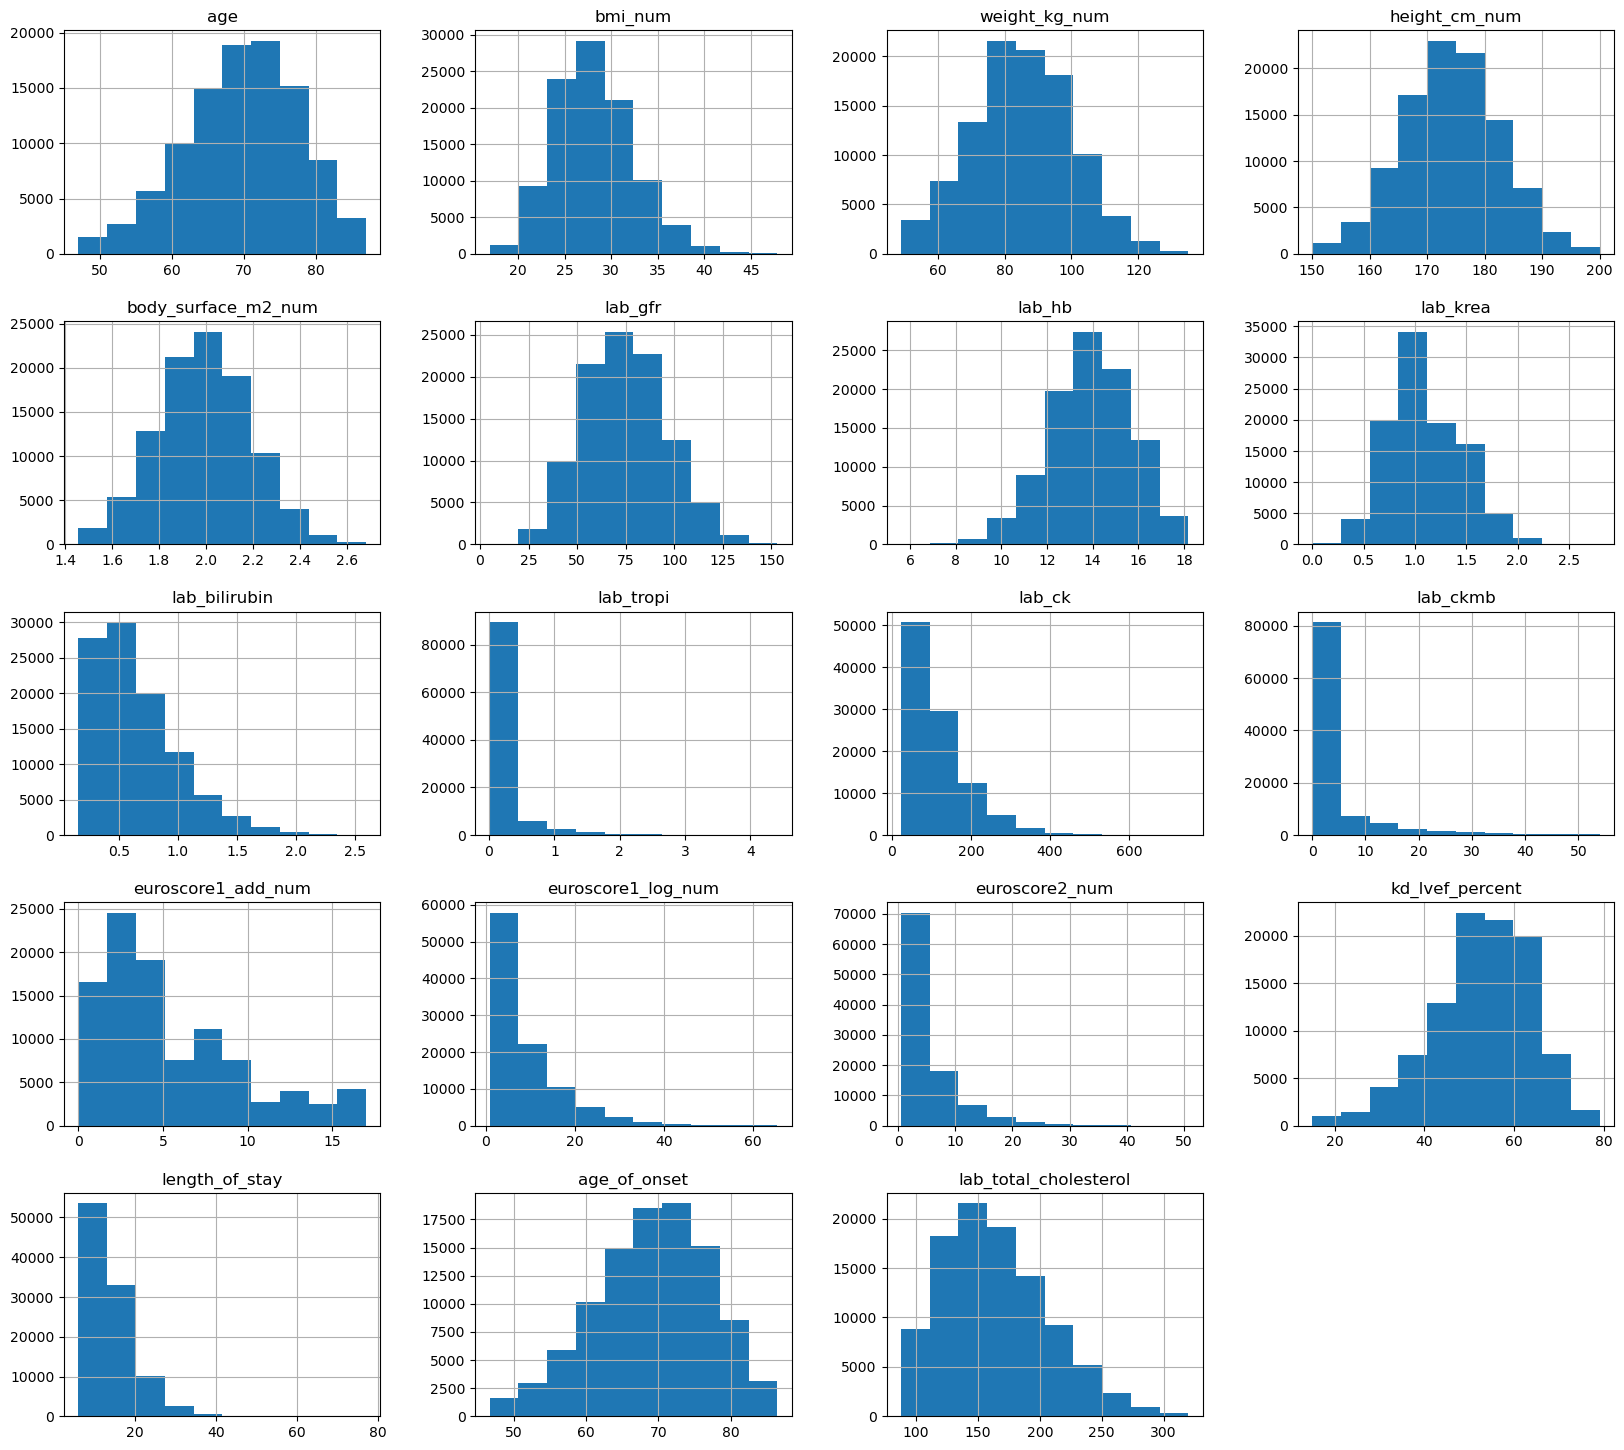

In [41]:
continuous_vars.remove('lab_ldl')
continuous_vars.remove('lab_hdl')

synthetic_data[continuous_vars].hist(figsize=(20, 18))
plt.show()

In [101]:
import importlib
import preprocess_utils
importlib.reload(preprocess_utils)

<module 'preprocess_utils' from '/home/georgy.lepsaya/clinical/preprocess_utils.py'>

In [76]:
preprocess_utils.find_skewness(synthetic_data[continuous_vars])

/opt/conda/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Right-skewed (15/19): Left-skewed (4/19): Normally distributed (0/19): 

In [77]:
preprocess_utils.find_skewness(df[continuous_vars])

Right-skewed (13/19): Left-skewed (6/19): Normally distributed (5/19): 

# Split to train and test sets

In [78]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(synthetic_data, test_size=0.2, random_state=42)

In [79]:
clindata = train_set.drop("ldl_hdl_ratio", axis=1)
clindata_labels = train_set["ldl_hdl_ratio"].copy()

# Scaling and transforming

In [102]:
clindata_transformed = preprocess_utils.log2_transform(clindata_num)

/home/georgy.lepsaya/.local/lib/python3.8/site-packages/pandas/core/internals/blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [103]:
from sklearn.preprocessing import StandardScaler

clindata_num = clindata_transformed

std_scaler = StandardScaler()
clindata_scaled = std_scaler.fit_transform(clindata_num)

/opt/conda/lib/python3.8/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/opt/conda/lib/python3.8/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/opt/conda/lib/python3.8/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [92]:
preprocess_utils.find_skewness(pd.DataFrame(clindata_scaled))

/opt/conda/lib/python3.8/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Right-skewed (0/19): Left-skewed (19/19): Normally distributed (5/19): 